In [3]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} numpy

Solving environment: done

# All requested packages already installed.



In [4]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

In [5]:
conda install git

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /private/var/folders/mg/qy246_x17bs3ss4t64jbv0m80000gn/T/pip-req-build-nr9xr5e2
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /private/var/folders/mg/qy246_x17bs3ss4t64jbv0m80000gn/T/pip-req-build-nr9xr5e2
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-cp37-none-any.whl size=16947 sha256=c2de45e75f8b53fba3d06c53c4fca81e3abe319c7c33a9636977df40c55ba6c8
  Stored in directory: /private/var/folders/mg/qy246_x17bs3ss4t64jbv0m80000gn/T/pip-ephem-wheel-cache-m3w_tva4/wheels/0c/57/26/1c12886a219af04a38ca1e674fdeeff40b8a5963326ba3c71a
Successfully built qiskit-textbook
Note: you may need to restart the kernel to use updated packages.


In [7]:
#intall git and qiskit textbook

In [21]:
# Quantum States and Qubits
#import this to run code below
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit import Gate
from math import pi

In [9]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()
#qc_encode is used to flip the bit from 0 to 1 and 1 to 0. In this case it is 0 to 1.

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [10]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

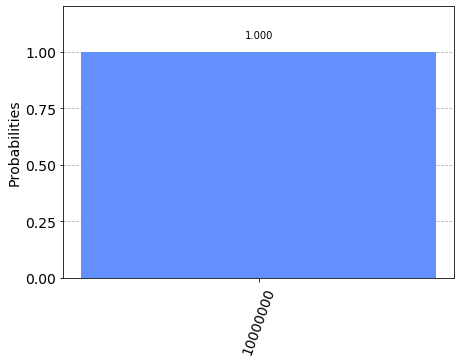

In [12]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)
#This flips the 7th qubit to 1 and plots the result

In [25]:
#use qc.swap to swap qubits
a = 0
b = 1
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw()

q_0: ─X─
      │ 
q_1: ─X─

In [13]:
#quantum gates are used as operations to change a qubit between states
#gates are reversible 
#Toffoli gate is an example of a logical and in quantum computing
#There are also other gates that can be used as AND operators

In [23]:
#This is an example of the Toffoli gate (CCX gate)
#This gate flips the third qubit(target) if the first and second qubit (control) are both in state 1
#Toffoli gate performs an X on the target 
#An X-gate switches the amplitudes of the states 0 and 1
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
theta = pi
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [24]:
qc = QuantumCircuit(3)
qc.cp(theta,b,t)
#This is a diagonal and symmetric gate that induces a phase on the state of the target qubit, depending on the control state
qc.cx(a,b)
#CNOT gate (CX) performs an X-gate on the target if the control is 1
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)
qc.draw()

q_0: ─────────■────────────■───■─────
            ┌─┴─┐        ┌─┴─┐ │     
q_1: ─■─────┤ X ├─■──────┤ X ├─┼─────
      │P(π) └───┘ │P(-π) └───┘ │P(π) 
q_2: ─■───────────■────────────■─────